In [4]:
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix 

In [36]:
N = 10
y = np.array([None]*10)

def llenarY(n,N=10):
    for n in range(N):
      y[n] = math.cos(((2*math.pi*n)/N))+0.1*rnd.random()


def f(x):
    f = 0
    for i in range(N):
        aux = x[i] - y[i]
        f += aux**2
        if i > 0:
            aux = x[i]-x[i-1]
            f += 2.5*aux**2
    return f


# gradiente  ∇f
def grad(x):
    g = np.array([None]*10)
    for i in range(N):
        g[i] = 2.0*(x[i]-y[i])
        if i > 0:
            g[i] += 5*(x[i]-x[i-1])
        if i < 10-1:
            g[i] += 5*(x[i]-x[i+1])
    return g


def hessiano(x):
    a = lil_matrix((N, N))
    for c in range(N):
        if (c-1 >= 0):
            a[c, c-1] = -5
        if (1 < c < N-1):
            a[c, c] = 12
        else:
            a[c, c] = 7
        if (c+1 < N):
            a[c, c+1] = -5
    
    return a 

    # return np.array([
    #     [7, -5, 0, 0, 0, 0, 0, 0, 0, 0],
    #     [-5, 12, -5, 0, 0, 0, 0, 0, 0, 0],
    #     [0, -5, 12, -5, 0, 0, 0, 0, 0, 0],
    #     [0, 0, -5, 12, -5, 0, 0, 0, 0, 0],
    #     [0, 0, 0, -5, 12, -5, 0, 0, 0, 0],
    #     [0, 0, 0, 0, -5, 12, -5, 0, 0, 0],
    #     [0, 0, 0, 0, 0, -5, 12, -5, 0, 0],
    #     [0, 0, 0, 0, 0, 0, -5, 12, -5, 0],
    #     [0, 0, 0, 0, 0, 0, 0, -5, 12, -5],
    #     [0, 0, 0, 0, 0, 0, 0, 0, -5, 7]
    # ])


# dirección del gradiente p
def dirgrad(x):
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p


In [ ]:
#Calculos de phi
def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return (np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [ ]:
#Gradiente Conjugado

def gradienteConjugado(x0, b, k=0, tol=1e-6):
    a = hessiano(x0)
    r = np.dot(hessiano(x0),x0)-b
    p = r*-1
    print(x0)
    print("k, x0, alpha, beta, Ap")
    rDotr = np.dot(r, r)
    AdotP = np.dot(hessiano(x0), p)
    while np.linalg.norm(r) >= tol:
        alpha = rDotr / np.dot(AdotP, p)
        x0 = x0 + alpha*p
        r1 = r + alpha * AdotP
        b = (np.dot(r1, r1))/rDotr
        p = -r1 + b*p
        # print(x0, f(x0), alpha, b)
        print(k,x0, alpha, b,AdotP)
        r = r1
        rDotr = np.dot(r, r)
        AdotP = np.dot(hessiano(x0), p)
        k += 1
    return x0

In [ ]:
llenarY(n=10, N=10)
b = [2*i for i in y]
x0 = np.array([2*i for i in y])

print("<==Grad Conjugado==>")
gradienteConjugado(x0, b)


<==Grad Conjugado==>
[ 2.13322793  1.67522558  0.70576147 -0.44588007 -1.47529723 -1.94130141
 -1.57189875 -0.41808627  0.62320893  1.7375497 ]
k, x0, alpha, beta, Ap
0 [ 1.25482831  0.83469762  0.38471544 -0.23597281 -0.62288824 -0.72627711
 -0.48086999 -0.44678218  0.57197714  0.28602412] 0.19858738935719145 0.55152369854738 [ -9.80000575 -20.59097139  -3.52212087  -0.69454462  15.63165813
  24.48847753  36.0581969  -27.91383623  34.17299612 -49.87486957]
1 [ 0.92938184  0.67068571  0.2649836  -0.11828823 -0.38754099 -0.41982573
 -0.39062945 -0.09469045  0.09627268  0.19097311] 0.06619335201074117 0.039335505631287446 [ -22.02737452    3.89387522  -18.20644381   12.60153815   10.62776099
   30.9619862   -33.38445644   92.94619831 -105.65497974   25.88122933]
2 [ 0.81683653  0.62439819  0.28510812 -0.07830501 -0.32957204 -0.47664875
 -0.33523934 -0.14522144  0.06532974  0.26761308] 0.09282749955374069 0.3443687377526907 [ -5.99369347  -1.00558887   2.94110969   0.96233513   8.40081246

array([ 0.67844498,  0.52317739,  0.24213564, -0.08320415, -0.35264958,
       -0.4680954 , -0.38251909, -0.13557067,  0.14076674,  0.34876906])

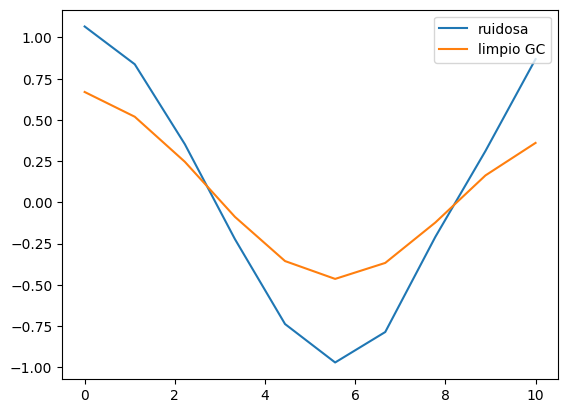

In [ ]:
# Graficar

limpio = [0.66947085,  0.51940158,  0.24624031, -0.08776957, -0.35583385,
          -0.46394805, -0.36699457, -0.12195927,  0.16349912,  0.36074262]

x = np.linspace(0,10, 10)

plt.plot(x, y, label="ruidosa")
plt.plot(x, limpio , label="limpio GC")
plt.legend(loc=1)


[[ 7. -5.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-5.  7. -5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -5. 12. -5.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -5. 12. -5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -5. 12. -5.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -5. 12. -5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -5. 12. -5.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -5. 12. -5.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -5. 12. -5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -5.  7.]]
